# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">

In this final project, an unsupervised clustering will be performed on the customer's records extracted into [`online_retail.xlsx`](https://github.com/thuynh386/olist_ecommerce_dataset/blob/master/online_retail_II.xlsx?raw=true). 
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Requirements</p>   
    
### 1. Import libraries

Import libraries that support the analysis and visualization of data, e.g. pandas, matplotlib, seaborn, sklearn, etc.

|Invoice|StockCode|	Description|	Quantity	|InvoiceDate|	Price|	Customer ID|	Country|
|-|-|	-|	-	|-|	-|	-|	-|
|0	|489434 |85048|	15CM CHRISTMAS GLASS BALL 20 LIGHTS	12	|2009-12-01 07:45:00	|6.95	|13085.0	|United Kingdom|
|1	|489434 |79323P|	PINK CHERRY LIGHTS	12|	2009-12-01 07:45:00|	6.75|	13085.0|	United Kingdom|

### 2. Load datasets

The dataset can be accessed [here](https://github.com/thuynh386/olist_ecommerce_dataset/blob/master/online_retail_II.xlsx?raw=true) and can be loaded from excel using pandas.
Further analysis can be performed on the dataset to discover the relationship between the features and the problem of features.
E.g:
- How many customers are there in the dataset?
- Describe the dataset with the necessary information?
- Is there any abnormal type for each feature?
- How many unique values are there in each feature?
- How many missing values are there in each feature?
- Are there any outliers in each feature?
    
### 3. Data cleaning and preprocessing 
- Remove the outliers if any.
- Remove the missing values if any.
- Convert the date to datetime format.
- Convert the quantity to numeric.
- Convert the customer id to numeric.
- Remove the duplicates and test data where StockCode is 'TEST' or 'M'.

### 4. Data visualization and analysis
- Visualize the data with the help of matplotlib and seaborn for the above analysis.

### 5. Feature creation
Create new features from the existing features to capture the RFM (Recency, Frequency, Monetary) of the customer.
- Create `StockValue` feature, which is the product of `Quantity` and `Price`.
- Create `Recency` feature, which is the difference between `InvoiceDate` and `InvoiceDate` of the last invoice.
- Create `Frequency` feature, which is the number of invoices of the customer.
- Create `Monetary` feature, which is the sum of `StockValue` of the invoices.
Make sure that the features are in the same scale in the dataset with no missing values or outliers.
    
### 6. Clustering with suitable algorithm
Perform clustering on the dataset using the algorithm that is suitable for the problem. E.g Kmeans, GMM, DBSCAN, etc.
In terms of K-means, make sure to find the optimal number of clusters using the elbow method.
Visualize the clusters using the above analysis. Examine the clusters formed via scatter plot.

### 7. Evaluate the clustering results and conclusion of the analysis (Important)

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load datasets

In [ ]:
# pd.read_excel('online_retail.xlsx',sheet_name=...)
sheet1 = pd.read_excel('online_retail.xlsx', sheet_name = 'Year 2009-2010')
sheet2 = pd.read_excel('online_retail.xlsx', sheet_name = 'Year 2010-2011')

In [6]:
print(sheet1.shape)
print(sheet2.shape)
print('Total of rows after combing two sheets: ', sheet1.shape[0] + sheet2.shape[0])

(525461, 8)
(541910, 8)
Total of rows after combing two sheets:  1067371


In [7]:
# Combine two sheets into one data
data = pd.concat([sheet1, sheet2], ignore_index = True)
# pd.concat()

In [8]:
print(data.shape)

(1067371, 8)


In [9]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [14]:
# Total rows and columns of customer data
data.shape

(1067371, 8)

In [15]:
# Names of columns in data
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [16]:
# General Information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [17]:
# Columns having missing values needed addressing
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [18]:
# ALl Columns having NaN values with percentages
pd.DataFrame(data.isna().sum()/len(data)*100).T

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0.0,0.0,0.410541,0.0,0.0,0.0,22.766873,0.0


#### Question 1: How many customers are there in the dataset?

In [19]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [46]:
customer_no = data['Customer ID'].nunique()
print('The total number of customers in the dataset is ', customer_no)

The total number of customers in the dataset is  5942


#### Question 2: Describe the dataset with the necessary information?

In [47]:
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [76]:
'''
Delete all these values
'''
data[data['Price'] < 0] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [57]:
data[data['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


##### Note 1:
- Two features ['Quantity', 'Price'] having negative values which is little confusing and inappropriate
- Customer ID is now float64 types but should be object type as it is distinct for each customer and can not be calculated
- All values having negative Price values does have NaN values for Customer ID so should be pay attention to this

In [49]:
data.select_dtypes(exclude = ['int64', 'float64']).describe()

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_5288\2510281447.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.select_dtypes(exclude = ['int64', 'float64']).describe()


,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371.0,1067371,1062989,1067371,1067371
unique,53628.0,5305,5698,47635,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350.0,5829,5918,1350,981330
first,NaN,NaN,NaN,2009-12-01 07:45:00,NaN
last,NaN,NaN,NaN,2011-12-09 12:50:00,NaN


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


##### Note 2:
- Problem 1: Having missing values in columns Description, Customer ID
- Problem 2: Inappropriate dtypes for some features: Category -> Country, StockCode; Object -> Customer ID

#### Question 3: Is there any abnormal type for each feature?

In [58]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


- Problem 2: Inappropriate dtypes for some features: Category -> Country, StockCode; Object -> Customer ID

#### Question 4: How many unique values are there in each feature?

In [65]:
pd.DataFrame(data.nunique()).T.rename(index = {0: 'Number of unique values'})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Number of unique values,53628,5305,5698,1057,47635,2807,5942,43


#### Question 5: How many missing values are there in each feature?

In [72]:
pd.DataFrame(data.isna().sum()).T.rename(index = {0: 'Number of missing values'})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Number of missing values,0,0,4382,0,0,0,243007,0


In [68]:
pd.DataFrame(data.isna().sum()/len(data)*100).T.rename(index = {0: 'Percentages of missing values'})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Percentages of missing values,0.0,0.0,0.410541,0.0,0.0,0.0,22.766873,0.0


#### Question 6: Are there any outliers in each feature?

<AxesSubplot:>

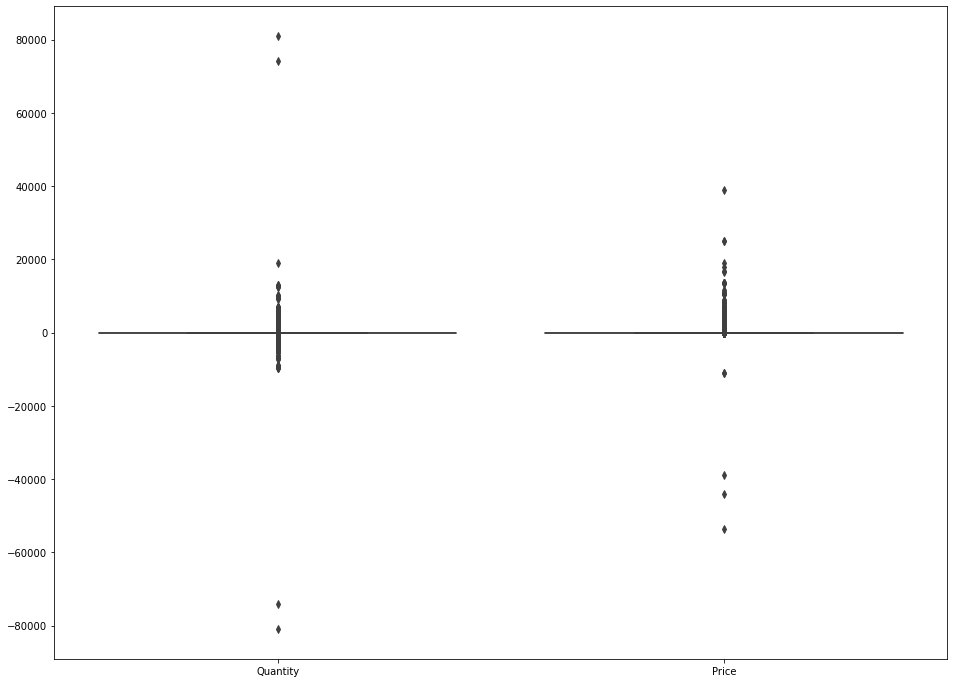

In [74]:
plt.figure(figsize = (16, 12))

sns.boxplot(data = data.select_dtypes(include = ['int64', 'float64']).drop('Customer ID', axis = 1))

- Problem 3: Outliers (Quantity and Price)

#### Question 7: Duplicates

In [79]:
data.duplicated().sum()

34335

- Problem 4: Duplicates

#### Question 8: StockCode: TEST or M 

In [80]:
data[data['StockCode'].isin(['TEST', 'M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
1058543,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
1059769,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
1063782,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


- Problem 5: Delete all rows having StockCode: TEST and M

### 3. Data cleaning and preprocessing

In [ ]:
Remove the outliers if any.
Remove the missing values if any.
Convert the date to datetime format.
Convert the quantity to numeric.
Convert the customer id to numeric.
Remove the duplicates and test data where StockCode is 'TEST' or 'M'.

#### Remove the outliers if any

We have two features having outliers needed addressing: Quantity and Price

##### Quantity Outliers

In [81]:
# Using Capping method:
# IQR = 75% (q3) - 25% (q1)
# 75% + 1.5IQR
# 25% - 1.5IQR

In [82]:
Qua_q3 = data['Quantity'].quantile(0.75)
Qua_q1 = data['Quantity'].quantile(0.25)

# Calculate Quantity_lower_limit, Quantity_upper_limit
Qua_IQR  = Qua_q3 - Qua_q1

Quantity_lower_limit = Qua_q1 - 1.5 * Qua_IQR
Quantity_upper_limit = Qua_q3 + 1.5 * Qua_IQR

print(Quantity_lower_limit, Quantity_upper_limit)

-12.5 23.5


In [83]:
data['Quantity_New'] = pd.DataFrame(np.where(data['Quantity'] > Quantity_upper_limit, Quantity_upper_limit,
                                    np.where(data['Quantity'] < Quantity_lower_limit, Quantity_lower_limit, 
                                             data['Quantity'])))
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_New
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5


<AxesSubplot:title={'center':'boxplot after capping'}>

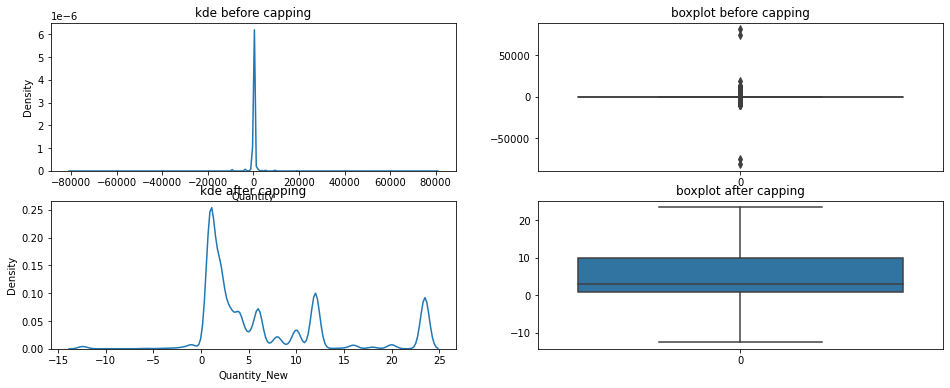

In [85]:
plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
plt.title('kde before capping')
sns.kdeplot(data = data['Quantity'])

plt.subplot(2,2,2)
plt.title('boxplot before capping')
sns.boxplot(data = data['Quantity'])

plt.subplot(2,2,3)
plt.title('kde after capping')
sns.kdeplot(data = data['Quantity_New'])

plt.subplot(2,2,4)
plt.title('boxplot after capping')
sns.boxplot(data = data['Quantity_New'])

##### Price Outliers

In [86]:
# Using Capping method:
# IQR = 75% (q3) - 25% (q1)
# 75% + 1.5IQR
# 25% - 1.5IQR

In [87]:
Pri_q3 = data['Price'].quantile(0.75)
Pri_q1 = data['Price'].quantile(0.25)

# Calculate Quantity_lower_limit, Quantity_upper_limit
Pri_IQR  = Pri_q3 - Pri_q1

Price_lower_limit = Pri_q1 - 1.5 * Pri_IQR
Price_upper_limit = Pri_q3 + 1.5 * Pri_IQR

print(Price_lower_limit, Price_upper_limit)

-3.1000000000000005 8.5


In [88]:
data['Price_New'] = pd.DataFrame(np.where(data['Price'] > Price_upper_limit, Price_upper_limit,
                                    np.where(data['Price'] < Price_lower_limit, Price_lower_limit, 
                                             data['Price'])))
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_New,Price_New
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5,1.25


<AxesSubplot:title={'center':'boxplot after capping'}>

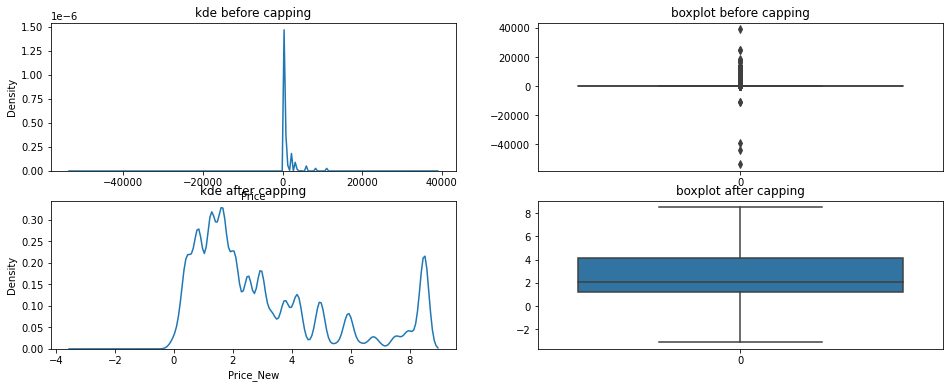

In [89]:
plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
plt.title('kde before capping')
sns.kdeplot(data = data['Price'])

plt.subplot(2,2,2)
plt.title('boxplot before capping')
sns.boxplot(data = data['Price'])

plt.subplot(2,2,3)
plt.title('kde after capping')
sns.kdeplot(data = data['Price_New'])

plt.subplot(2,2,4)
plt.title('boxplot after capping')
sns.boxplot(data = data['Price_New'])

#### Remove the missing values if any.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Invoice       1067371 non-null  object        
 1   StockCode     1067371 non-null  object        
 2   Description   1062989 non-null  object        
 3   Quantity      1067371 non-null  int64         
 4   InvoiceDate   1067371 non-null  datetime64[ns]
 5   Price         1067371 non-null  float64       
 6   Customer ID   824364 non-null   float64       
 7   Country       1067371 non-null  object        
 8   Quantity_New  1067371 non-null  float64       
 9   Price_New     1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 81.4+ MB


- We have two features Description and Customer ID having NaN values, however, we could not impute mean, median or mode for Customer ID as this is a distinct feature so if we want, we have to separate them into a different group and build model to predict those Customer ID.
- Simply here, we just ignore and remove all NaN Customer ID out of the dataset

In [91]:
# Remove missing values if any
data2 = data.dropna(subset = ['Customer ID'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       824364 non-null  object        
 1   StockCode     824364 non-null  object        
 2   Description   824364 non-null  object        
 3   Quantity      824364 non-null  int64         
 4   InvoiceDate   824364 non-null  datetime64[ns]
 5   Price         824364 non-null  float64       
 6   Customer ID   824364 non-null  float64       
 7   Country       824364 non-null  object        
 8   Quantity_New  824364 non-null  float64       
 9   Price_New     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 69.2+ MB


#### Convert the date to datetime format.

- Feature InvoiceDate: Datetime64 already so we do not need to convert it

#### Convert the quantity to numeric & the customer id to numeric.

- As mentioned previously, Customer ID should be an integer type feature and Quanity Feature should be an integer as well

In [92]:
data2['Customer ID'] = data2['Customer ID'].astype('int64')
data2['Quantity_New'] = data2['Quantity_New'].astype('int64')

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_5288\2946853811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Customer ID'] = data2['Customer ID'].astype('int64')
C:\Users\Nguyen\AppData\Local\Temp\ipykernel_5288\2946853811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Quantity_New'] = data2['Quantity_New'].astype('int64')


In [93]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       824364 non-null  object        
 1   StockCode     824364 non-null  object        
 2   Description   824364 non-null  object        
 3   Quantity      824364 non-null  int64         
 4   InvoiceDate   824364 non-null  datetime64[ns]
 5   Price         824364 non-null  float64       
 6   Customer ID   824364 non-null  int64         
 7   Country       824364 non-null  object        
 8   Quantity_New  824364 non-null  int64         
 9   Price_New     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 69.2+ MB


#### Remove the duplicates and test data where StockCode is 'TEST' or 'M'.

In [95]:
# Remove Duplicates
data2[data2.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_New,Price_New
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom,1,3.75
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329,United Kingdom,6,0.85
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329,United Kingdom,12,0.65
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329,United Kingdom,1,3.75
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom,1,3.75
...,...,...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom,1,0.39
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom,1,2.49
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom,1,1.95
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom,1,2.10


In [96]:
data2 = data2.drop_duplicates()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       797885 non-null  object        
 1   StockCode     797885 non-null  object        
 2   Description   797885 non-null  object        
 3   Quantity      797885 non-null  int64         
 4   InvoiceDate   797885 non-null  datetime64[ns]
 5   Price         797885 non-null  float64       
 6   Customer ID   797885 non-null  int64         
 7   Country       797885 non-null  object        
 8   Quantity_New  797885 non-null  int64         
 9   Price_New     797885 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 67.0+ MB


In [97]:
# Remove test data where StockCode is 'TEST' or 'M'
data2 = data2[~data2['StockCode'].isin(['TEST', 'M'])]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796800 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       796800 non-null  object        
 1   StockCode     796800 non-null  object        
 2   Description   796800 non-null  object        
 3   Quantity      796800 non-null  int64         
 4   InvoiceDate   796800 non-null  datetime64[ns]
 5   Price         796800 non-null  float64       
 6   Customer ID   796800 non-null  int64         
 7   Country       796800 non-null  object        
 8   Quantity_New  796800 non-null  int64         
 9   Price_New     796800 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 66.9+ MB


In [98]:
data2[data2['StockCode'].isin(['TEST', 'M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_New,Price_New


### 4. Data visualization and analysis

### 5. Feature creation

### 6. Clustering with suitable algorithm

### 7. Evaluate the clustering results and conclusion of the analysis (Important)